In [1]:
import subprocess 
from subprocess import PIPE
import rasterio
import json
import glob 
import pandas as pd
import os
import numpy as np
import cv2

In [2]:
# The local folder path where the labels are stored
path_labels = '/Volumes/ADATA_HV620/SEN12-FLOOD/Sentinel_2/sen12floods_s2_labels'

In [3]:
# The local folder where the training images are stored
path_training_images = '/Volumes/ADATA_HV620/SEN12-FLOOD/Sentinel_2/Images/sen12floods_s2_source'

In [4]:
path_testing_images = '/Volumes/ADATA_HV620/SEN12-FLOOD/Sentinel_2/Images/test_images'

In [5]:
# This functions accepts as argument the name of the image and it searches for the coresponding label. 
# If the image depicts a flooded area then it returns the number one (1) otherwise it returns the number zero (0)

def image_label(product_id):
    
    rootdir = "/Volumes/ADATA_HV620/SEN12-FLOOD/Sentinel_2/sen12floods_s2_labels/sen12floods_s2_labels_"
    pd = product_id.split("_")
    pd = pd[3] + "_" + pd[4] + "_" + pd[5] + "_" + pd[6]
    
    json_data=open(rootdir + pd +"/stac.json", "rb")
    jdata = json.load(json_data)
    flood = jdata["properties"]["FLOODING"]
    

    if (flood == "False"):
        image_label = 0
    else:
        image_label = 1
    
    return image_label


In [6]:
# This function it accepts as argument the path of the folder where the image is stored.
# Inside this folder there is a json file containing the product id as a property
# It return the product id

def product_name(path):
    
    json_data=open(path+"/stac.json", "rb")
    jdata = json.load(json_data)
    
    return  jdata['id']

In [ ]:
/Volumes/ADATA_HV620/SEN12-FLOOD/Sentinel_2/sen12floods_s2_labels/sen12floods_s2_labels_0_2019_01_26

In [7]:
# This function is responsible for constructing the dataset in a way compatible with keras.
# It iterates through folders and searches for images along with their coresponding label.

def load_data():
    
    data = [] 
    images = []
    labels = []
    
    for folder in imagelist:
        try:
            product_id = product_name(folder)
            print(f"Processing {product_id} image product")
            label = image_label(product_id)
        
            # Open the img
            image = cv2.imread(folder + "/stack.tif")
            # Append the image and its corresponding label to the output
            images.append(image)
            labels.append(label)
        except:
            pass
        
        
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')
        
        
    data.append([images, labels])     

    return images, labels

## Load the Training Dataset

In [8]:
# Create a list with all the folders containing spectral bands


imagelist = []
rootdir = path_training_images
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        imagelist.append(d)
        
        
print(f"The number of training samples is currently = {len(imagelist)}")

The number of training samples is currently = 1679


In [9]:
train_images, train_labels = load_data()

Processing sen12floods_s2_source_0001_2018_12_18 image product
Processing sen12floods_s2_source_0001_2018_12_23 image product
Processing sen12floods_s2_source_0001_2019_01_02 image product
Processing sen12floods_s2_source_0001_2019_01_12 image product
Processing sen12floods_s2_source_0001_2019_01_17 image product
Processing sen12floods_s2_source_0001_2019_01_22 image product
Processing sen12floods_s2_source_0001_2019_02_01 image product
Processing sen12floods_s2_source_0001_2019_02_06 image product
Processing sen12floods_s2_source_0004_2018_12_17 image product
Processing sen12floods_s2_source_0004_2018_12_22 image product
Processing sen12floods_s2_source_0004_2019_01_16 image product
Processing sen12floods_s2_source_0005_2018_12_17 image product
Processing sen12floods_s2_source_0005_2018_12_22 image product
Processing sen12floods_s2_source_0005_2019_01_06 image product
Processing sen12floods_s2_source_0005_2019_01_16 image product
Processing sen12floods_s2_source_0006_2018_12_17 image 

Processing sen12floods_s2_source_0031_2018_12_28 image product
Processing sen12floods_s2_source_0031_2019_02_01 image product
Processing sen12floods_s2_source_0033_2018_12_28 image product
Processing sen12floods_s2_source_0033_2019_02_01 image product
Processing sen12floods_s2_source_0034_2018_12_28 image product
Processing sen12floods_s2_source_0034_2019_02_01 image product
Processing sen12floods_s2_source_0035_2018_12_28 image product
Processing sen12floods_s2_source_0035_2019_02_01 image product
Processing sen12floods_s2_source_0036_2018_12_28 image product
Processing sen12floods_s2_source_0036_2019_02_01 image product
Processing sen12floods_s2_source_0037_2018_12_28 image product
Processing sen12floods_s2_source_0037_2019_02_01 image product
Processing sen12floods_s2_source_0042_2018_12_28 image product
Processing sen12floods_s2_source_0042_2019_02_01 image product
Processing sen12floods_s2_source_0043_2019_02_01 image product
Processing sen12floods_s2_source_0044_2018_12_28 image 

Processing sen12floods_s2_source_0088_2019_01_05 image product
Processing sen12floods_s2_source_0088_2019_01_10 image product
Processing sen12floods_s2_source_0088_2019_01_30 image product
Processing sen12floods_s2_source_0088_2019_02_04 image product
Processing sen12floods_s2_source_0088_2019_02_14 image product
Processing sen12floods_s2_source_0089_2018_12_26 image product
Processing sen12floods_s2_source_0089_2018_12_31 image product
Processing sen12floods_s2_source_0089_2019_01_05 image product
Processing sen12floods_s2_source_0089_2019_01_10 image product
Processing sen12floods_s2_source_0089_2019_01_30 image product
Processing sen12floods_s2_source_0089_2019_02_04 image product
Processing sen12floods_s2_source_0089_2019_02_14 image product
Processing sen12floods_s2_source_0090_2018_12_13 image product
Processing sen12floods_s2_source_0090_2018_12_28 image product
Processing sen12floods_s2_source_0090_2019_01_02 image product
Processing sen12floods_s2_source_0090_2019_01_22 image 

Processing sen12floods_s2_source_0108_2019_01_27 image product
Processing sen12floods_s2_source_0108_2019_02_06 image product
Processing sen12floods_s2_source_0108_2019_02_11 image product
Processing sen12floods_s2_source_0109_2018_12_13 image product
Processing sen12floods_s2_source_0109_2018_12_28 image product
Processing sen12floods_s2_source_0109_2019_01_02 image product
Processing sen12floods_s2_source_0109_2019_01_22 image product
Processing sen12floods_s2_source_0109_2019_01_27 image product
Processing sen12floods_s2_source_0109_2019_02_06 image product
Processing sen12floods_s2_source_0109_2019_02_11 image product
Processing sen12floods_s2_source_0111_2018_12_13 image product
Processing sen12floods_s2_source_0111_2018_12_28 image product
Processing sen12floods_s2_source_0111_2019_01_02 image product
Processing sen12floods_s2_source_0111_2019_01_22 image product
Processing sen12floods_s2_source_0111_2019_01_27 image product
Processing sen12floods_s2_source_0111_2019_02_06 image 

Processing sen12floods_s2_source_0138_2019_02_28 image product
Processing sen12floods_s2_source_0138_2019_03_10 image product
Processing sen12floods_s2_source_0138_2019_03_25 image product
Processing sen12floods_s2_source_0138_2019_03_30 image product
Processing sen12floods_s2_source_0138_2019_04_09 image product
Processing sen12floods_s2_source_0139_2019_02_23 image product
Processing sen12floods_s2_source_0139_2019_02_28 image product
Processing sen12floods_s2_source_0139_2019_03_10 image product
Processing sen12floods_s2_source_0139_2019_03_25 image product
Processing sen12floods_s2_source_0139_2019_03_30 image product
Processing sen12floods_s2_source_0139_2019_04_09 image product
Processing sen12floods_s2_source_0140_2019_01_31 image product
Processing sen12floods_s2_source_0140_2019_02_10 image product
Processing sen12floods_s2_source_0140_2019_02_25 image product
Processing sen12floods_s2_source_0140_2019_03_12 image product
Processing sen12floods_s2_source_0140_2019_04_16 image 

Processing sen12floods_s2_source_0161_2019_02_10 image product
Processing sen12floods_s2_source_0161_2019_02_25 image product
Processing sen12floods_s2_source_0161_2019_04_01 image product
Processing sen12floods_s2_source_0161_2019_04_16 image product
Processing sen12floods_s2_source_0162_2019_01_31 image product
Processing sen12floods_s2_source_0162_2019_02_10 image product
Processing sen12floods_s2_source_0162_2019_02_25 image product
Processing sen12floods_s2_source_0162_2019_04_01 image product
Processing sen12floods_s2_source_0162_2019_04_16 image product
Processing sen12floods_s2_source_0163_2019_01_31 image product
Processing sen12floods_s2_source_0163_2019_02_10 image product
Processing sen12floods_s2_source_0163_2019_02_25 image product
Processing sen12floods_s2_source_0163_2019_04_01 image product
Processing sen12floods_s2_source_0163_2019_04_16 image product
Processing sen12floods_s2_source_0165_2019_01_31 image product
Processing sen12floods_s2_source_0165_2019_02_10 image 

Processing sen12floods_s2_source_0193_2019_03_10 image product
Processing sen12floods_s2_source_0193_2019_03_25 image product
Processing sen12floods_s2_source_0193_2019_04_04 image product
Processing sen12floods_s2_source_0193_2019_04_14 image product
Processing sen12floods_s2_source_0193_2019_04_24 image product
Processing sen12floods_s2_source_0194_2019_02_23 image product
Processing sen12floods_s2_source_0194_2019_02_28 image product
Processing sen12floods_s2_source_0194_2019_03_10 image product
Processing sen12floods_s2_source_0194_2019_03_25 image product
Processing sen12floods_s2_source_0194_2019_04_04 image product
Processing sen12floods_s2_source_0194_2019_04_14 image product
Processing sen12floods_s2_source_0194_2019_04_24 image product
Processing sen12floods_s2_source_0196_2019_02_13 image product
Processing sen12floods_s2_source_0196_2019_02_23 image product
Processing sen12floods_s2_source_0196_2019_02_28 image product
Processing sen12floods_s2_source_0196_2019_03_10 image 

Processing sen12floods_s2_source_0216_2019_04_19 image product
Processing sen12floods_s2_source_0216_2019_04_24 image product
Processing sen12floods_s2_source_0217_2019_02_13 image product
Processing sen12floods_s2_source_0217_2019_02_23 image product
Processing sen12floods_s2_source_0217_2019_02_28 image product
Processing sen12floods_s2_source_0217_2019_03_25 image product
Processing sen12floods_s2_source_0217_2019_04_04 image product
Processing sen12floods_s2_source_0217_2019_04_19 image product
Processing sen12floods_s2_source_0217_2019_04_24 image product
Processing sen12floods_s2_source_0218_2019_02_13 image product
Processing sen12floods_s2_source_0218_2019_02_23 image product
Processing sen12floods_s2_source_0218_2019_02_28 image product
Processing sen12floods_s2_source_0218_2019_03_25 image product
Processing sen12floods_s2_source_0218_2019_04_04 image product
Processing sen12floods_s2_source_0218_2019_04_19 image product
Processing sen12floods_s2_source_0218_2019_04_24 image 

Processing sen12floods_s2_source_0236_2019_03_27 image product
Processing sen12floods_s2_source_0236_2019_04_08 image product
Processing sen12floods_s2_source_0236_2019_04_21 image product
Processing sen12floods_s2_source_0236_2019_04_23 image product
Processing sen12floods_s2_source_0238_2019_03_09 image product
Processing sen12floods_s2_source_0238_2019_03_12 image product
Processing sen12floods_s2_source_0238_2019_03_17 image product
Processing sen12floods_s2_source_0238_2019_03_19 image product
Processing sen12floods_s2_source_0238_2019_03_22 image product
Processing sen12floods_s2_source_0238_2019_03_27 image product
Processing sen12floods_s2_source_0238_2019_04_08 image product
Processing sen12floods_s2_source_0238_2019_04_21 image product
Processing sen12floods_s2_source_0238_2019_04_23 image product
Processing sen12floods_s2_source_0240_2019_03_09 image product
Processing sen12floods_s2_source_0240_2019_03_12 image product
Processing sen12floods_s2_source_0240_2019_03_27 image 

Processing sen12floods_s2_source_0257_2019_03_09 image product
Processing sen12floods_s2_source_0257_2019_03_12 image product
Processing sen12floods_s2_source_0257_2019_03_19 image product
Processing sen12floods_s2_source_0257_2019_03_22 image product
Processing sen12floods_s2_source_0258_2019_02_25 image product
Processing sen12floods_s2_source_0258_2019_03_02 image product
Processing sen12floods_s2_source_0258_2019_03_04 image product
Processing sen12floods_s2_source_0258_2019_03_07 image product
Processing sen12floods_s2_source_0258_2019_03_09 image product
Processing sen12floods_s2_source_0258_2019_03_12 image product
Processing sen12floods_s2_source_0258_2019_03_19 image product
Processing sen12floods_s2_source_0258_2019_03_22 image product
Processing sen12floods_s2_source_0259_2019_02_25 image product
Processing sen12floods_s2_source_0259_2019_03_02 image product
Processing sen12floods_s2_source_0259_2019_03_04 image product
Processing sen12floods_s2_source_0259_2019_03_07 image 

Processing sen12floods_s2_source_18_2019_03_10 image product
Processing sen12floods_s2_source_18_2019_03_25 image product
Processing sen12floods_s2_source_18_2019_03_30 image product
Processing sen12floods_s2_source_18_2019_04_09 image product
Processing sen12floods_s2_source_19_2019_03_09 image product
Processing sen12floods_s2_source_19_2019_03_12 image product
Processing sen12floods_s2_source_19_2019_03_17 image product
Processing sen12floods_s2_source_19_2019_03_19 image product
Processing sen12floods_s2_source_19_2019_03_22 image product
Processing sen12floods_s2_source_19_2019_03_27 image product
Processing sen12floods_s2_source_19_2019_04_08 image product
Processing sen12floods_s2_source_19_2019_04_21 image product
Processing sen12floods_s2_source_19_2019_04_23 image product
Processing sen12floods_s2_source_1_2019_02_01 image product
Processing sen12floods_s2_source_1_2019_02_11 image product
Processing sen12floods_s2_source_1_2019_02_21 image product
Processing sen12floods_s2_s

Processing sen12floods_s2_source_38_2019_01_29 image product
Processing sen12floods_s2_source_38_2019_02_03 image product
Processing sen12floods_s2_source_39_2018_12_26 image product
Processing sen12floods_s2_source_39_2018_12_31 image product
Processing sen12floods_s2_source_39_2019_01_05 image product
Processing sen12floods_s2_source_39_2019_01_10 image product
Processing sen12floods_s2_source_39_2019_01_30 image product
Processing sen12floods_s2_source_39_2019_02_04 image product
Processing sen12floods_s2_source_3_2019_02_25 image product
Processing sen12floods_s2_source_3_2019_03_02 image product
Processing sen12floods_s2_source_3_2019_03_04 image product
Processing sen12floods_s2_source_3_2019_03_07 image product
Processing sen12floods_s2_source_3_2019_03_09 image product
Processing sen12floods_s2_source_3_2019_03_12 image product
Processing sen12floods_s2_source_3_2019_03_17 image product
Processing sen12floods_s2_source_3_2019_03_19 image product
Processing sen12floods_s2_source

Processing sen12floods_s2_source_5_2019_04_27 image product
Processing sen12floods_s2_source_60_2018_12_16 image product
Processing sen12floods_s2_source_60_2018_12_26 image product
Processing sen12floods_s2_source_60_2019_01_05 image product
Processing sen12floods_s2_source_60_2019_01_10 image product
Processing sen12floods_s2_source_60_2019_01_15 image product
Processing sen12floods_s2_source_61_2019_02_23 image product
Processing sen12floods_s2_source_61_2019_04_14 image product
Processing sen12floods_s2_source_61_2019_04_19 image product
Processing sen12floods_s2_source_62_2019_03_09 image product
Processing sen12floods_s2_source_62_2019_03_12 image product
Processing sen12floods_s2_source_62_2019_03_17 image product
Processing sen12floods_s2_source_62_2019_03_19 image product
Processing sen12floods_s2_source_62_2019_03_22 image product
Processing sen12floods_s2_source_62_2019_03_27 image product
Processing sen12floods_s2_source_62_2019_04_08 image product
Processing sen12floods_s2

## Test Dataset

In [10]:
# Create a list with all the folders containing spectral bands


imagelist = []
rootdir = path_testing_images # define the path for the folder
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        imagelist.append(d)
        
        
print(f"The number of testing samples is = {len(imagelist)}")

The number of testing samples is = 268


In [11]:
test_images, test_labels = load_data()

Processing sen12floods_s2_source_0273_2019_02_25 image product
Processing sen12floods_s2_source_0273_2019_03_02 image product
Processing sen12floods_s2_source_0273_2019_03_04 image product
Processing sen12floods_s2_source_0273_2019_03_07 image product
Processing sen12floods_s2_source_0273_2019_03_09 image product
Processing sen12floods_s2_source_0273_2019_03_12 image product
Processing sen12floods_s2_source_0273_2019_03_17 image product
Processing sen12floods_s2_source_0273_2019_03_19 image product
Processing sen12floods_s2_source_0273_2019_03_22 image product
Processing sen12floods_s2_source_0274_2019_02_25 image product
Processing sen12floods_s2_source_0274_2019_03_02 image product
Processing sen12floods_s2_source_0274_2019_03_04 image product
Processing sen12floods_s2_source_0274_2019_03_07 image product
Processing sen12floods_s2_source_0274_2019_03_09 image product
Processing sen12floods_s2_source_0274_2019_03_12 image product
Processing sen12floods_s2_source_0274_2019_03_17 image 

Processing sen12floods_s2_source_0296_2019_02_13 image product
Processing sen12floods_s2_source_0296_2019_02_28 image product
Processing sen12floods_s2_source_0296_2019_03_15 image product
Processing sen12floods_s2_source_0298_2019_01_09 image product
Processing sen12floods_s2_source_0298_2019_02_13 image product
Processing sen12floods_s2_source_0298_2019_02_28 image product
Processing sen12floods_s2_source_0298_2019_03_15 image product
Processing sen12floods_s2_source_0299_2019_01_09 image product
Processing sen12floods_s2_source_0299_2019_02_13 image product
Processing sen12floods_s2_source_0299_2019_02_28 image product
Processing sen12floods_s2_source_0299_2019_03_15 image product
Processing sen12floods_s2_source_0300_2019_01_09 image product
Processing sen12floods_s2_source_0300_2019_02_13 image product
Processing sen12floods_s2_source_0300_2019_02_28 image product
Processing sen12floods_s2_source_0300_2019_03_15 image product
Processing sen12floods_s2_source_0301_2019_01_09 image 

Processing sen12floods_s2_source_0336_2019_03_15 image product


## Explore the Dataset

In [20]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [13]:
train_counts = np.unique(train_labels, return_counts=True)

In [39]:
print(train_labels.shape[])

IndexError: tuple index out of range

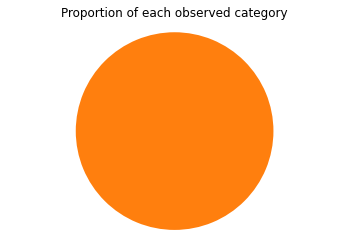

In [41]:
plt.pie(train_counts[0], explode=(0, 0))
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

## Model Creation

In [40]:
# Import the Deep Learing modules
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import pydot

# from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (512, 512, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [50]:
# # Export the model's architecture into an image
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

## Compile the Model

In [44]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

## Fit the model on the available training data

In [45]:
history = model.fit(train_images, train_labels, batch_size=28, epochs=20, validation_split = 0.2)

Train on 1343 samples, validate on 336 samples
Epoch 1/20
1343/1343 [==============================] - 437s 325ms/sample - loss: 27.8175 - acc: 0.7036 - val_loss: 0.6371 - val_acc: 0.8244
Epoch 2/20
1343/1343 [==============================] - 403s 300ms/sample - loss: 0.3818 - acc: 0.8481 - val_loss: 0.5825 - val_acc: 0.8065
Epoch 3/20
1343/1343 [==============================] - 398s 297ms/sample - loss: 0.1793 - acc: 0.9337 - val_loss: 0.6894 - val_acc: 0.7917
Epoch 4/20
1343/1343 [==============================] - 398s 296ms/sample - loss: 0.0928 - acc: 0.9680 - val_loss: 0.6670 - val_acc: 0.7143
Epoch 5/20
1343/1343 [==============================] - 415s 309ms/sample - loss: 0.0636 - acc: 0.9829 - val_loss: 0.8339 - val_acc: 0.7024
Epoch 6/20
1343/1343 [==============================] - 604s 450ms/sample - loss: 0.0312 - acc: 0.9911 - val_loss: 1.1824 - val_acc: 0.7708
Epoch 7/20
1343/1343 [==============================] - 392s 292ms/sample - loss: 0.0212 - acc: 0.9940 - val_los

In [51]:
# Save the trained model
model.save("my_model")
# model = keras.models.load_model('path/to/location')

## Evaluating the result

In [46]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

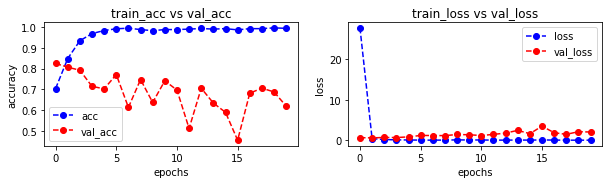

In [47]:
plot_accuracy_loss(history)

In [48]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 510, 510, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 253, 253, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 508032)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65028224  
_________________________________________________________________
dense_13 (Dense)             (None, 2)                

In [49]:
test_loss = model.evaluate(test_images, test_labels)

268/268 [==============================] - 31s 114ms/sample - loss: 3.3056 - acc: 0.5784


## Feature extraction with VGG ImageNet

In [20]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

### Get the features directly from VGG16

In [21]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [36]:
# Save the features calculated earlier
np.save("train_features.npy", train_features)
np.save("test_features", test_features)

# Load the trained weights
# loaded_array = np.load("train_features.npy")
# loaded_array = np.load("test_features.npy")

In [35]:
type(train_features)

numpy.ndarray

In [22]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

## Training on top of VGG

Let's train a simple one-layer Neural Network on the features extracted from VGG.

In [37]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=28, epochs=30, validation_split = 0.2)

Train on 1343 samples, validate on 336 samples
Epoch 1/30
1343/1343 [==============================] - 6s 4ms/sample - loss: 3.0723 - acc: 0.7774 - val_loss: 0.9093 - val_acc: 0.6726
Epoch 2/30
1343/1343 [==============================] - 5s 4ms/sample - loss: 0.2838 - acc: 0.9039 - val_loss: 1.1163 - val_acc: 0.8304
Epoch 3/30
1343/1343 [==============================] - 5s 4ms/sample - loss: 0.0983 - acc: 0.9695 - val_loss: 0.9022 - val_acc: 0.7917
Epoch 4/30
1343/1343 [==============================] - 5s 4ms/sample - loss: 0.0493 - acc: 0.9844 - val_loss: 1.0730 - val_acc: 0.8095
Epoch 5/30
1343/1343 [==============================] - 5s 4ms/sample - loss: 0.0274 - acc: 0.9933 - val_loss: 0.9836 - val_acc: 0.8125
Epoch 6/30
1343/1343 [==============================] - 6s 4ms/sample - loss: 0.0231 - acc: 0.9940 - val_loss: 1.6147 - val_acc: 0.8244
Epoch 7/30
1343/1343 [==============================] - 5s 4ms/sample - loss: 0.0101 - acc: 0.9978 - val_loss: 1.3923 - val_acc: 0.8244
E

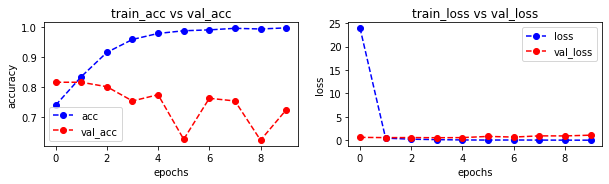

In [38]:
plot_accuracy_loss(history)

In [39]:
test_loss = model2.evaluate(test_features, test_labels)

268/268 [==============================] - 1s 3ms/sample - loss: 5.1529 - acc: 0.6045
